In [114]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split

In [115]:
df = pd.read_csv('https://stepik.org/media/attachments/course/4852/space_can_be_a_dangerous_place.csv')

In [116]:
df

,r,phi,peradventure_index,dustiness,black_hole_is_near,buggers_were_noticed,nearby_system_has_planemo,dangerous
0,169.1,138.0,22.3212,0.706285,0,1,1,1
1,11.1,148.0,1.4652,-0.410512,1,1,1,1
2,274.6,201.0,36.2472,0.756457,1,1,1,1
3,172.8,173.0,22.8096,0.035221,1,1,1,1
4,223.3,222.0,29.4756,0.197271,0,1,1,1
...,...,...,...,...,...,...,...,...
99995,301.7,249.0,39.8244,0.397064,0,1,1,1
99996,194.0,350.0,25.6080,-1.062202,0,1,1,1
99997,201.4,112.0,26.5848,1.571040,0,1,1,1
99998,7.8,115.0,1.0296,-1.206575,0,1,1,1


In [117]:
X = df.drop('dangerous', axis=1)
y = df['dangerous']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [118]:
clf_rf = RandomForestClassifier()

In [119]:
params = {
    'n_estimators': range(3, 12, 2),
    'max_depth': range(4, 9, 2),
    'min_samples_leaf': range(5, 10, 2),
    'min_samples_split': range(2, 7, 2)
}

In [120]:
grid_search = GridSearchCV(clf_rf, params, cv=3, n_jobs=-1)

In [121]:
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': range(4, 9, 2),
                         'min_samples_leaf': range(5, 10, 2),
                         'min_samples_split': range(2, 7, 2),
                         'n_estimators': range(3, 12, 2)})

In [122]:
grid_search.best_params_

{'max_depth': 6,
 'min_samples_leaf': 5,
 'min_samples_split': 4,
 'n_estimators': 5}

In [123]:
best_rf = grid_search.best_estimator_

In [124]:
best_rf.score(X_test, y_test)

0.91296

In [125]:
feature_importances = pd.DataFrame({
    'importances': best_rf.feature_importances_}, index=X.columns
).sort_values('importances')
feature_importances

,importances
phi,0.004991
dustiness,0.005554
r,0.006692
peradventure_index,0.008567
black_hole_is_near,0.012046
nearby_system_has_planemo,0.420724
buggers_were_noticed,0.541426


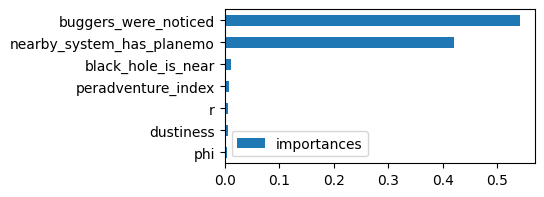

In [126]:
feature_importances.plot(kind='barh', figsize=(4, 2));